In [ ]:
!rm -rf NYC-property-sale-data-analysis
! git clone https://github.com/Auazure/NYC-property-sale-data-analysis.git

Cloning into 'NYC-property-sale-data-analysis'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading data
bronx2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_bronx.csv",thousands=',')
brooklyn2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_brooklyn.csv",thousands=',')
manhattan2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_manhattan.csv",thousands=',')
queens2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_queens.csv",thousands=',')
statenisland2018 = pd.read_csv("/content/NYC-property-sale-data-analysis/2018_statenisland.csv",thousands=',')

bronx2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_bronx.csv",thousands=',')
brooklyn2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_brooklyn.csv",thousands=',')
manhattan2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_manhattan.csv",thousands=',')
queens2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_queens.csv",thousands=',')
statenisland2019 = pd.read_csv("/content/NYC-property-sale-data-analysis/2019_statenisland.csv",thousands=',')

# 1. Data cleaning


In [ ]:
NYC = pd.concat([manhattan2018, manhattan2019,bronx2018, bronx2019, 
                 queens2018, brooklyn2018, statenisland2018,queens2018, 
                 brooklyn2019, statenisland2019], ignore_index=True)
NYC.columns = [c.replace('\n', '') for c in NYC.columns]

In [ ]:
#Delete the duplicates and check that it worked
NYC = NYC.drop_duplicates(NYC.columns, keep='last')
sum(NYC.duplicated(NYC.columns))

0

In [ ]:
#Let's convert some of the columns to appropriate datatype

NYC['TAX CLASS AT TIME OF SALE'] = NYC['TAX CLASS AT TIME OF SALE'].astype('category')
NYC['LAND SQUARE FEET'] = pd.to_numeric(NYC['LAND SQUARE FEET'], errors='coerce')
NYC['GROSS SQUARE FEET']= pd.to_numeric(NYC['GROSS SQUARE FEET'], errors='coerce')
NYC['BOROUGH'] = NYC['BOROUGH'].astype('category')
NYC['SALE PRICE'] = NYC['SALE PRICE'].replace('[CA\$,]', '', regex=True).astype(float)


In [ ]:
# drop year built = 0
NYC = NYC[NYC['YEAR BUILT'] != 0]
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134151 entries, 0 to 167718
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   BOROUGH                                134151 non-null  category
 1   NEIGHBORHOOD                           134151 non-null  object  
 2   BUILDING CLASS CATEGORY                134151 non-null  object  
 3   TAX CLASS AS OF FINAL ROLL 18/19       133907 non-null  object  
 4   BLOCK                                  134151 non-null  int64   
 5   LOT                                    134151 non-null  int64   
 6   EASE-MENT                              0 non-null       float64 
 7   BUILDING CLASS AS OF FINAL ROLL 18/19  133907 non-null  object  
 8   ADDRESS                                134151 non-null  object  
 9   APARTMENT NUMBER                       29537 non-null   object  
 10  ZIP CODE                               13414

In [ ]:
NYC.dropna(how='all',inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134151 entries, 0 to 167718
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   BOROUGH                                134151 non-null  category
 1   NEIGHBORHOOD                           134151 non-null  object  
 2   BUILDING CLASS CATEGORY                134151 non-null  object  
 3   TAX CLASS AS OF FINAL ROLL 18/19       133907 non-null  object  
 4   BLOCK                                  134151 non-null  int64   
 5   LOT                                    134151 non-null  int64   
 6   EASE-MENT                              0 non-null       float64 
 7   BUILDING CLASS AS OF FINAL ROLL 18/19  133907 non-null  object  
 8   ADDRESS                                134151 non-null  object  
 9   APARTMENT NUMBER                       29537 non-null   object  
 10  ZIP CODE                               13414

In [ ]:
NYC.columns
NYC.info()
#drop unrecorded data
#NYC=NYC[(NYC['TOTAL UNITS']>0) & (NYC['LAND SQUARE FEET']>0) & (NYC['YEAR BUILT']>0)]
NYC[NYC["TOTAL UNITS"] != NYC['COMMERCIAL UNITS'] + NYC['RESIDENTIAL UNITS']]['TOTAL UNITS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134151 entries, 0 to 167718
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   BOROUGH                                134151 non-null  category
 1   NEIGHBORHOOD                           134151 non-null  object  
 2   BUILDING CLASS CATEGORY                134151 non-null  object  
 3   TAX CLASS AS OF FINAL ROLL 18/19       133907 non-null  object  
 4   BLOCK                                  134151 non-null  int64   
 5   LOT                                    134151 non-null  int64   
 6   EASE-MENT                              0 non-null       float64 
 7   BUILDING CLASS AS OF FINAL ROLL 18/19  133907 non-null  object  
 8   ADDRESS                                134151 non-null  object  
 9   APARTMENT NUMBER                       29537 non-null   object  
 10  ZIP CODE                               13414

51.0    43
55.0    32
57.0    32
2.0     14
19.0    12
9.0     11
85.0     9
0.0      7
1.0      7
4.0      6
3.0      4
7.0      4
18.0     2
11.0     2
8.0      1
6.0      1
24.0     1
21.0     1
69.0     1
Name: TOTAL UNITS, dtype: int64

In [ ]:
NYC.isnull().sum()

BOROUGH                                       0
NEIGHBORHOOD                                  0
BUILDING CLASS CATEGORY                       0
TAX CLASS AS OF FINAL ROLL 18/19            244
BLOCK                                         0
LOT                                           0
EASE-MENT                                134151
BUILDING CLASS AS OF FINAL ROLL 18/19       244
ADDRESS                                       0
APARTMENT NUMBER                         104614
ZIP CODE                                      9
RESIDENTIAL UNITS                         12247
COMMERCIAL UNITS                          12247
TOTAL UNITS                               12247
LAND SQUARE FEET                          12248
GROSS SQUARE FEET                         12247
YEAR BUILT                                 4931
TAX CLASS AT TIME OF SALE                     0
BUILDING CLASS AT TIME OF SALE                0
SALE PRICE                                    0
SALE DATE                               

In [ ]:
NYC

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0.0,5/23/18
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809.0,5/22/18
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000.0,12/3/18
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,10009.0,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0.0,4/25/18
5,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0.0,11/29/18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167714,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,95,NaN,B9,115 AMBASSADOR LANE,NaN,10309.0,2.0,0.0,2.0,8846.0,1710.0,2001.0,1,B9,637500.0,8/20/19
167715,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,48,NaN,B9,108 BERKSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,1,V0,599701.0,4/24/19
167716,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,49,NaN,B9,35 WILTSHIRE LANE,NaN,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,1,V0,896060.0,4/22/19
167717,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,28,NaN,V0,N/A QUAIL LANE,NaN,10309.0,0.0,0.0,0.0,2640.0,0.0,NaN,1,V0,26000.0,8/22/19


# 2. EDA


2.1 Target Variable

Sale Price

In [ ]:
NYC['SALE PRICE'].describe()
#len(NYC.loc[NYC['SALE PRICE'] == 0])/len(NYC) #percentage of sale price=0

count    1.341510e+05
mean     1.384748e+06
std      1.417094e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.750000e+05
75%      9.000000e+05
max      2.397502e+09
Name: SALE PRICE, dtype: float64

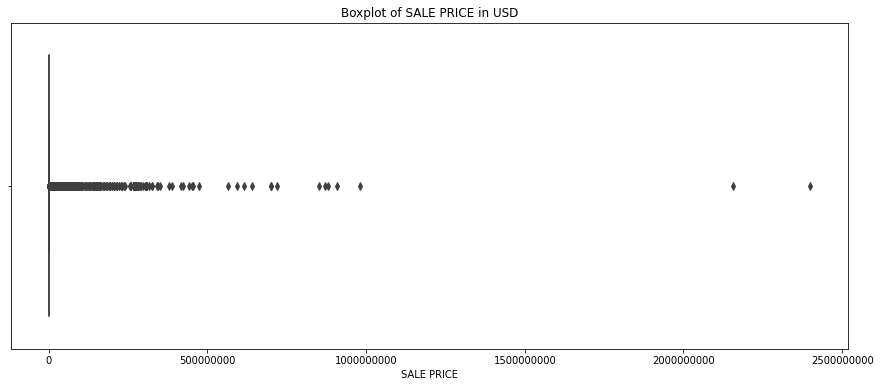

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['SALE PRICE'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Deal with outlier

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


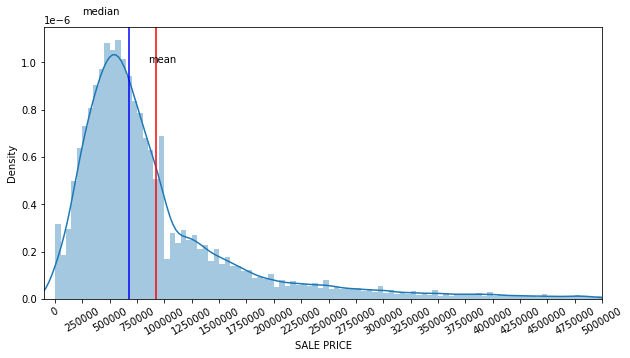

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
plotd = sns.distplot(NYC[(NYC['SALE PRICE']>100) & (NYC['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(NYC[(NYC['SALE PRICE']>100) & (NYC['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(NYC[(NYC['SALE PRICE']>100) & (NYC['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 69.771915
Kurtosis: 7821.691453


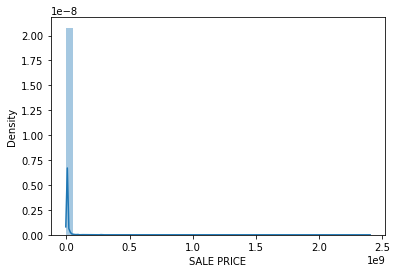

In [ ]:
NYC = NYC[NYC['SALE PRICE'] != 0]
sns.distplot(NYC['SALE PRICE'])
# Skewness and kurtosis
print("Skewness: %f" % NYC['SALE PRICE'].skew())
print("Kurtosis: %f" % NYC['SALE PRICE'].kurt())

In [ ]:
NYC[['SALE PRICE']].describe()

,SALE PRICE
count,9.443200e+04
mean,1.967187e+06
std,1.685632e+07
min,1.000000e+00
25%,4.327508e+05
50%,6.915950e+05
75%,1.200000e+06
max,2.397502e+09


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


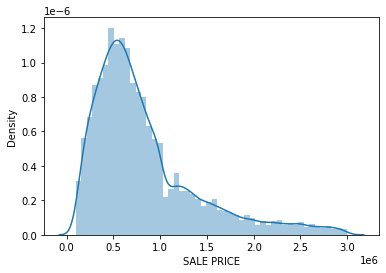

In [ ]:
NYC = NYC[(NYC['SALE PRICE'] > 100000) & (NYC['SALE PRICE'] < 3000000)]
sns.distplot(NYC['SALE PRICE'])

Skewness: 1.505952
Kurtosis: 2.121363


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


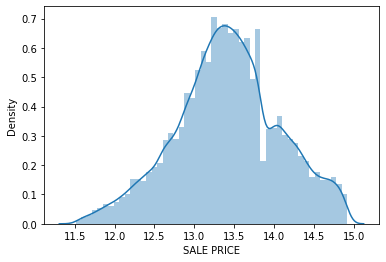

In [ ]:
# Skewness and kurtosis
print("Skewness: %f" % NYC['SALE PRICE'].skew())
print("Kurtosis: %f" % NYC['SALE PRICE'].kurt())
# log(x) transform
sns.distplot(np.log1p(NYC["SALE PRICE"]))

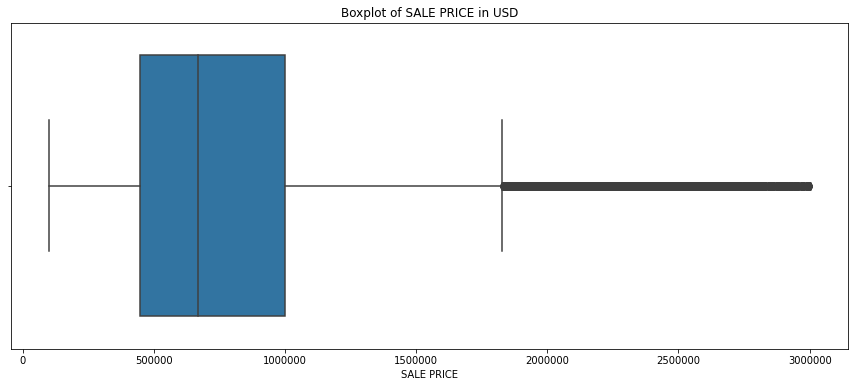

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['SALE PRICE'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

2.2 Features

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

In [ ]:
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
for each in NYC.columns:
    print(each,NYC[each].nunique())

BOROUGH 5
NEIGHBORHOOD 251
BUILDING CLASS CATEGORY 45
TAX CLASS AS OF FINAL ROLL 18/19 10
BLOCK 10871
LOT 2541
EASE-MENT 0
BUILDING CLASS AS OF FINAL ROLL 18/19 132
ADDRESS 75619
APARTMENT NUMBER 3503
ZIP CODE 184
RESIDENTIAL UNITS 60
COMMERCIAL UNITS 28
TOTAL UNITS 71
LAND SQUARE FEET 5597
GROSS SQUARE FEET 4471
YEAR BUILT 154
TAX CLASS AT TIME OF SALE 3
BUILDING CLASS AT TIME OF SALE 132
SALE PRICE 10363
SALE DATE 630


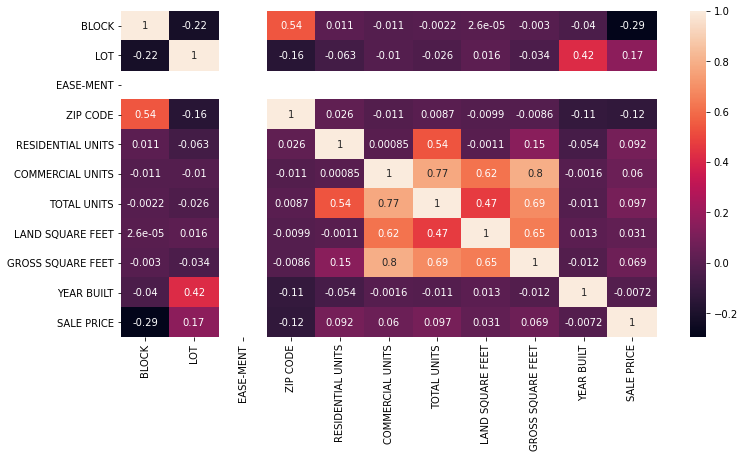

In [ ]:
# Colinearity heatmap
corr = NYC.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

# case-count (probably covid)???
# sp500 stock price???

In [ ]:
# Categorical variable colinearity
# Encoding

3.2.1 Borough
The name of the borough in which the property is located.

1 = Manhattan\
2 = Bronx\
3 = Brooklyn\
4 = Queens\
5 = Staten Island

In [ ]:
NYC['BOROUGH'].unique()

[1, 2, 3, 5, 4]
Categories (5, int64): [1, 2, 3, 5, 4]

In [ ]:
NYC['BOROUGH'].value_counts()

3    25640
1    19845
4    16643
5    11195
2     9450
Name: BOROUGH, dtype: int64

In [ ]:
# Convert the x-axis into something categorical
# NYC.loc[:,'BOROUGH'] = pd.Categorical(NYC['BOROUGH'])
NYC['BOROUGH'] = NYC['BOROUGH'].astype('category',copy=False)

In [ ]:
NYC['BOROUGH'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

In [ ]:
# plt.hist(NYC['BOROUGH'])

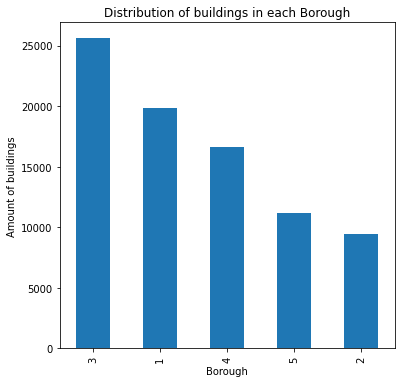

In [ ]:
plt.figure(figsize=(6,6))
NYC['BOROUGH'].value_counts().plot(kind='bar', 
                                   title='Distribution of buildings in each Borough', 
                                   xlabel = 'Borough', ylabel = 'Amount of buildings')

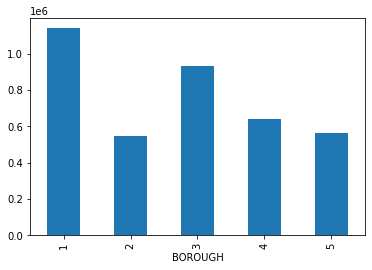

In [ ]:
# Average price by borough
NYC.groupby('BOROUGH').mean()['SALE PRICE'].plot(kind = 'bar')

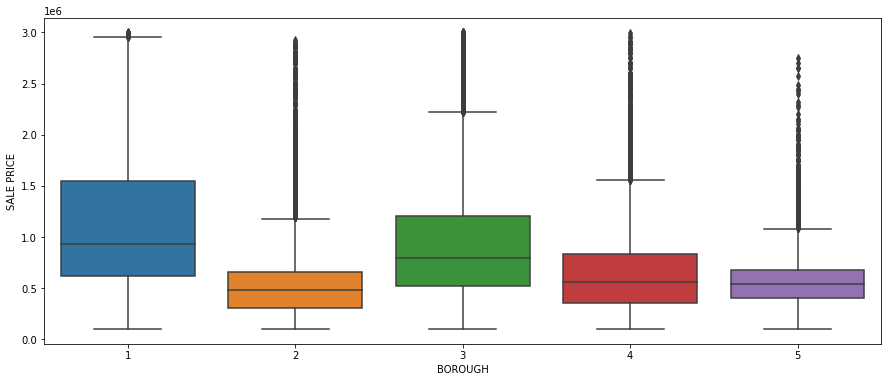

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['BOROUGH'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

3.2.2 Neighborhood

Department of Finance assessors determine the neighborhood name in the course of valuing
properties. The common name of the neighborhood is generally the same as the name
Finance designates. However, there may be slight differences in neighborhood boundary lines
and some sub-neighborhoods may not be included. 

In [ ]:
len(NYC['NEIGHBORHOOD'].unique())

251

Text(0, 0.5, 'Average sale price')

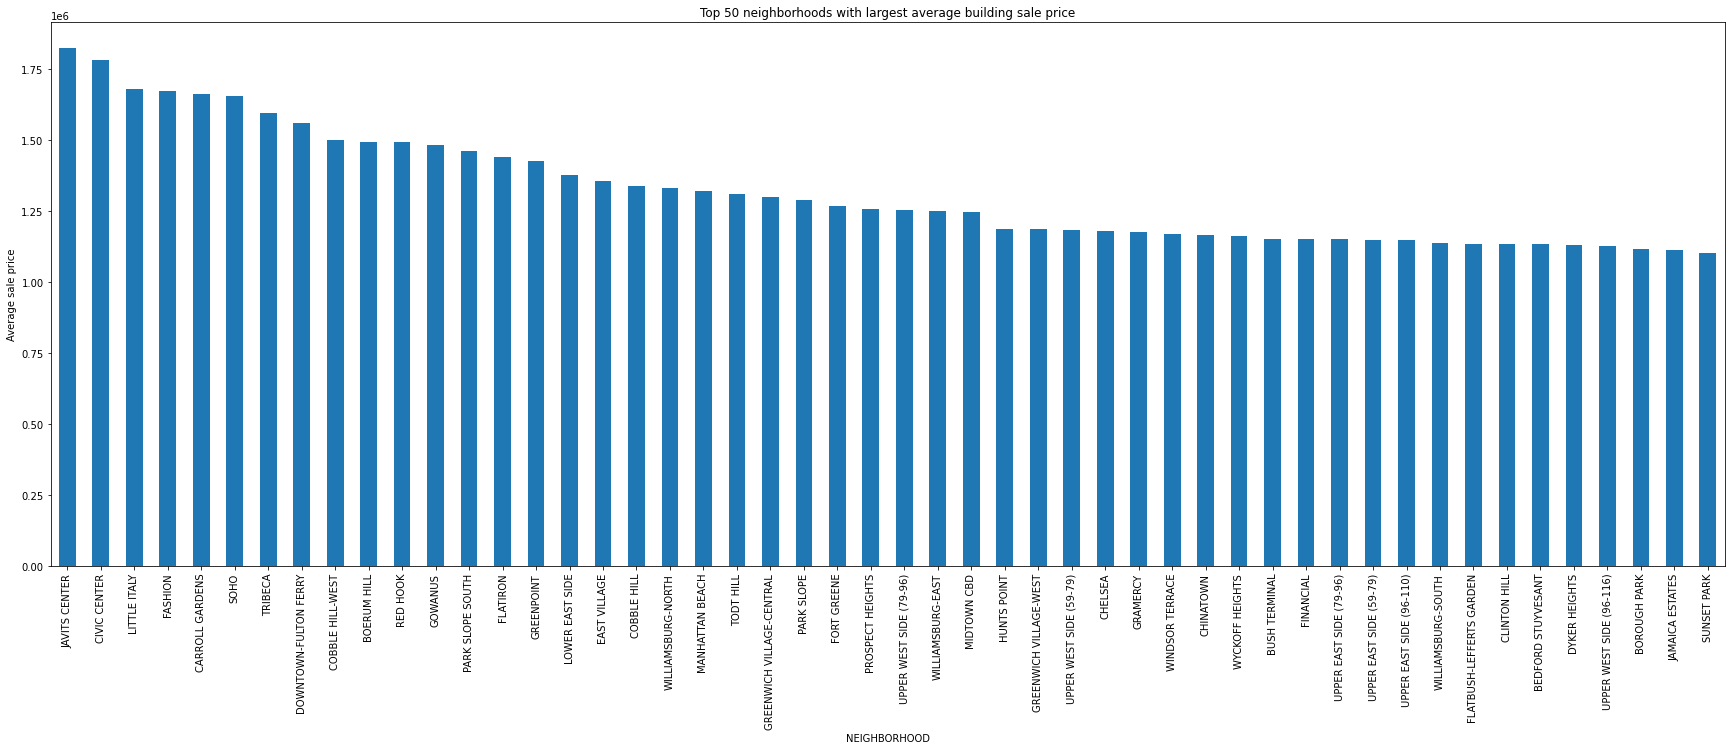

In [ ]:
# Top 50 neighborhoods with largest average building sale price
plt.figure(figsize=(30,10))
NYC.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending = False).head(50).plot(kind = 'bar')
plt.title("Top 50 neighborhoods with largest average building sale price")
plt.ylabel('Average sale price')

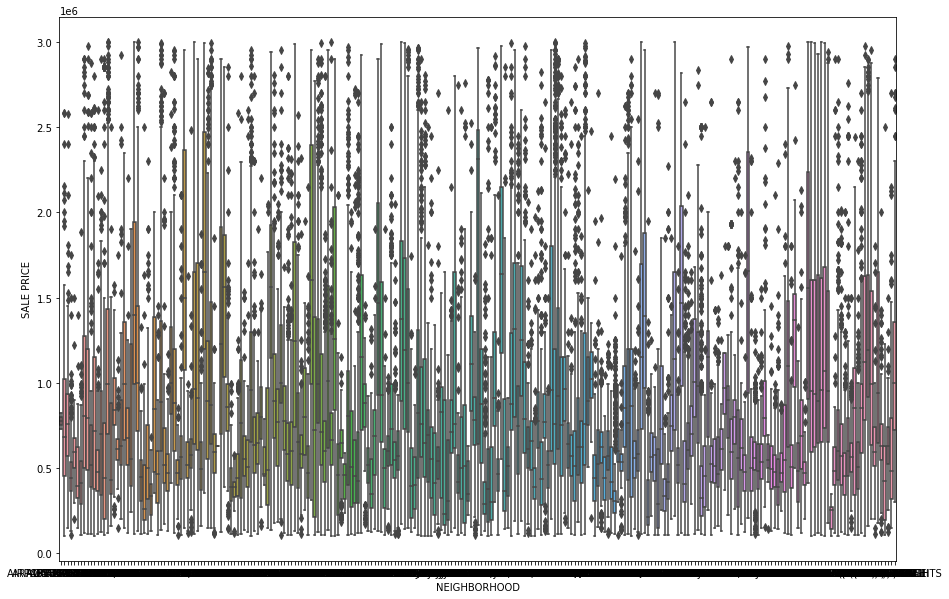

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=NYC['NEIGHBORHOOD'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

3.2.3 Building Class Category

This is a field that we are including so that users of the Rolling Sales Files can easily
identify similar properties by broad usage (e.g. One Family Homes) without looking up
individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class
Category, Block and Lot.

https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html


In [ ]:
len(NYC['BUILDING CLASS CATEGORY'].unique())

45

In [ ]:
NYC['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '17 CONDO COOPS',
       '04 TAX CLASS 1 CONDOS', '12 CONDOS - WALKUP APARTMENTS',
       '22 STORE BUILDINGS', '43 CONDO OFFICE BUILDINGS',
       '14 RENTALS - 4-10 UNIT', '21 OFFICE BUILDINGS',
       '28 COMMERCIAL CONDOS', '46 CONDO STORE BUILDINGS',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
       '47 CONDO NON-BUSINESS STORAGE', '02 TWO FAMILY DWELLINGS',
       '23 LOFT BUILDINGS', '44 CONDO PARKING',
       '03 THREE FAMILY DWELLINGS', '08 RENTALS - ELEVATOR APARTMENTS',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
       '01 ONE FAMILY DWELLINGS', '29 COMMERCIAL GARAGES',
       '32 HOSPITAL AND HEALTH FACILITIES', '37 RELIGIOUS FACILITIES',
       '38 ASYLUMS AND HOMES', '45 CONDO HOTELS', '11A CONDO-RENTALS',
       '06 TAX CLASS 1 - OTHER', '31 COMMERCIAL VAC

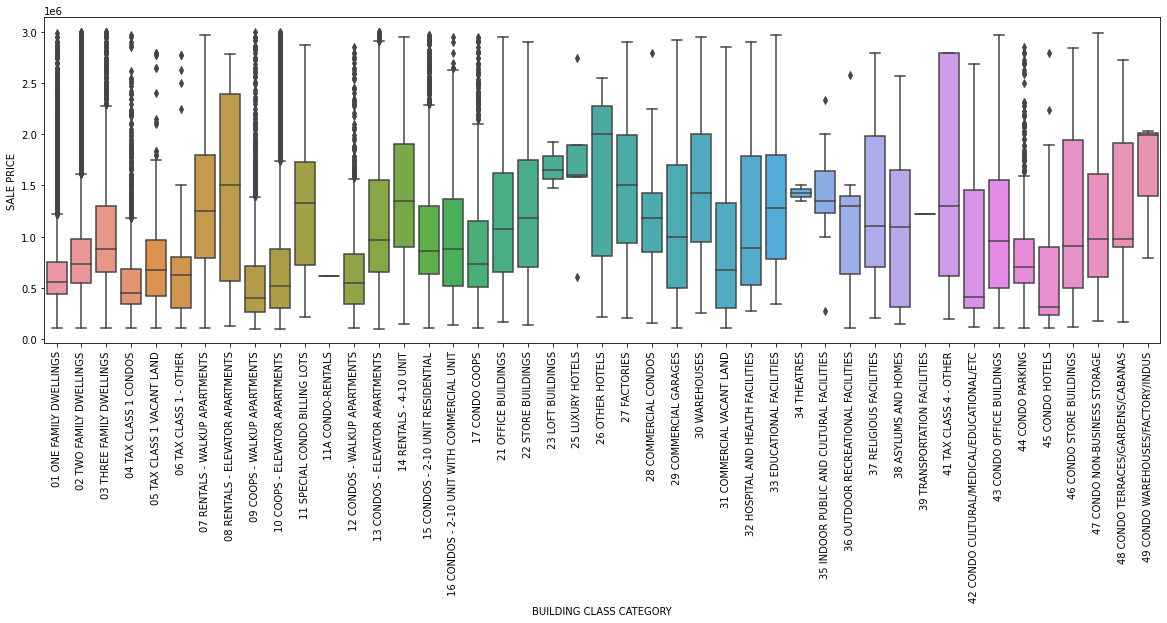

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = NYC['BUILDING CLASS CATEGORY'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.xticks(rotation = 90)
plt.show()

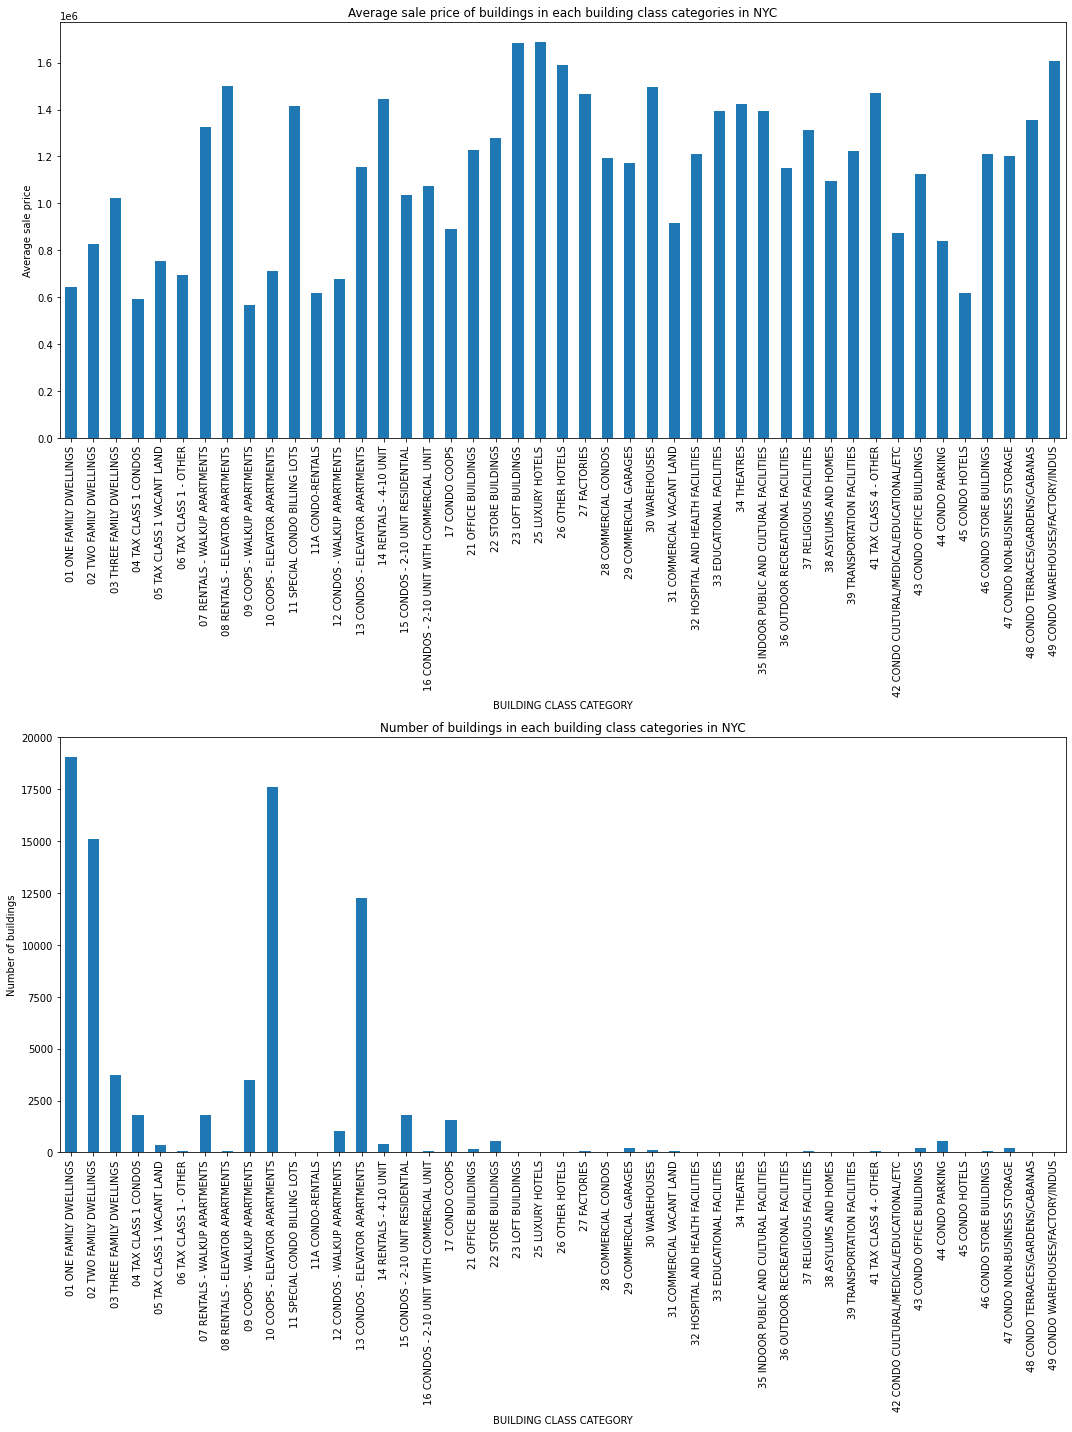

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,20), sharey=True)
# Average price by building class category
plt.subplot(211)
NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'].plot(kind = 'bar')
plt.title('Average sale price of buildings in each building class categories in NYC')
plt.ylabel('Average sale price')

# number of buildings by building class category
plt.subplot(212)
NYC.groupby('BUILDING CLASS CATEGORY').size().plot(kind = 'bar')
plt.title('Number of buildings in each building class categories in NYC')
plt.ylabel('Number of buildings')

plt.tight_layout()
plt.show()

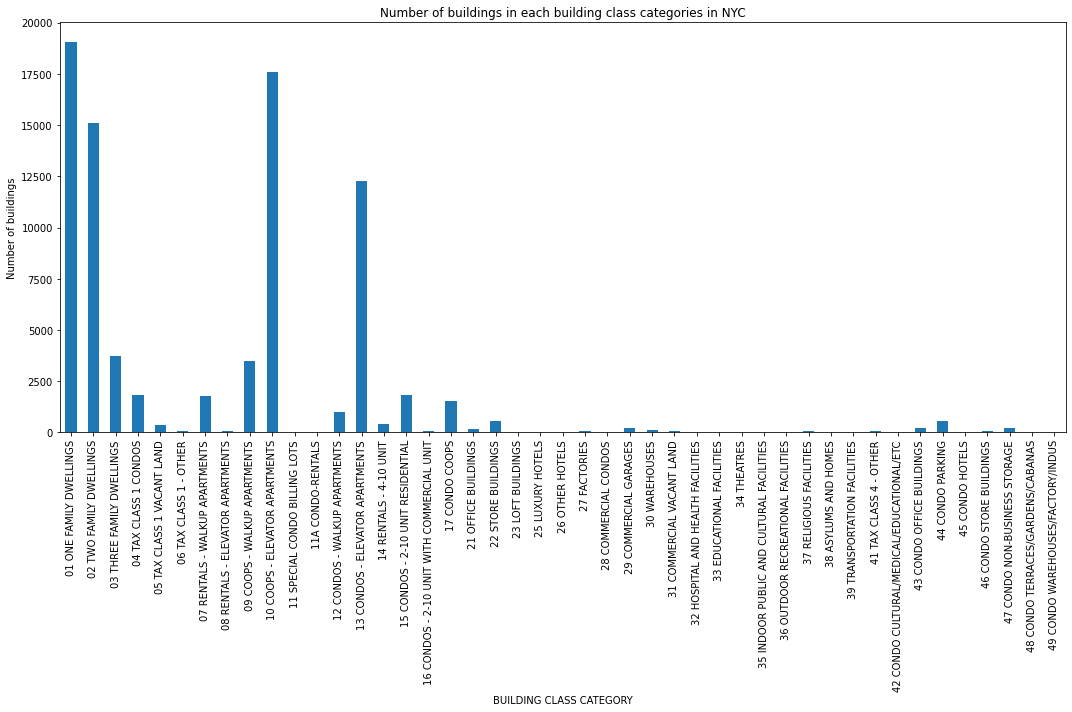

In [ ]:
fig, axs = plt.subplots(figsize=(15,10), sharey=True)
NYC.groupby('BUILDING CLASS CATEGORY').size().plot(kind = 'bar')
plt.title('Number of buildings in each building class categories in NYC')
plt.ylabel('Number of buildings')

plt.tight_layout()
plt.show()

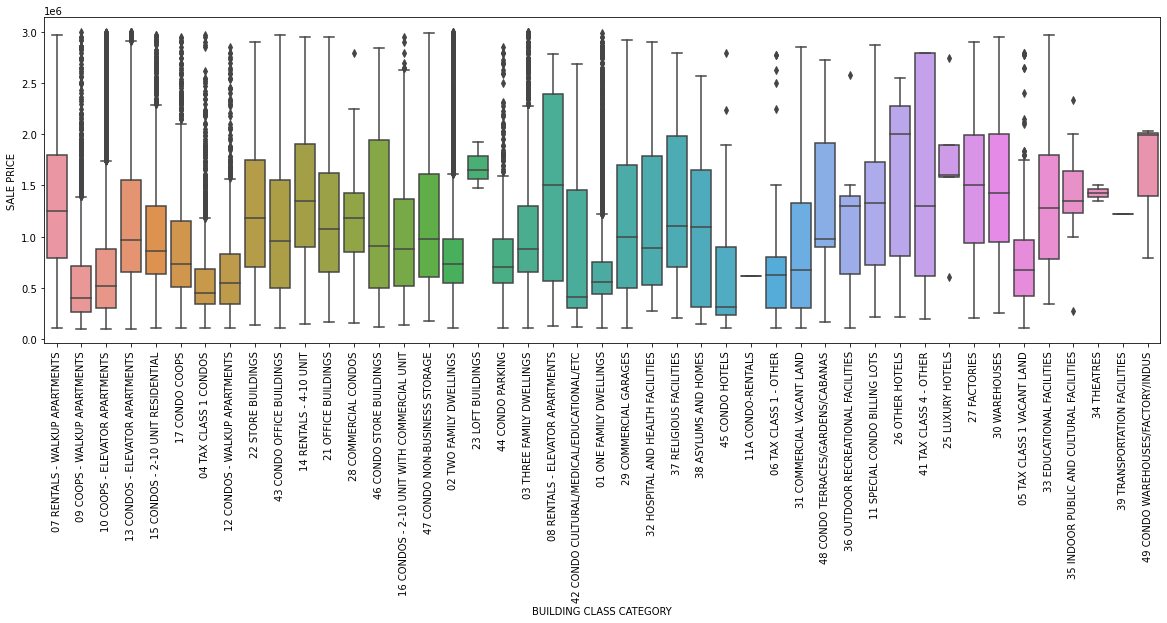

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x=NYC['BUILDING CLASS CATEGORY'], y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.xticks(rotation = 90)
plt.show()

Text(0, 0.5, 'Average sale price')

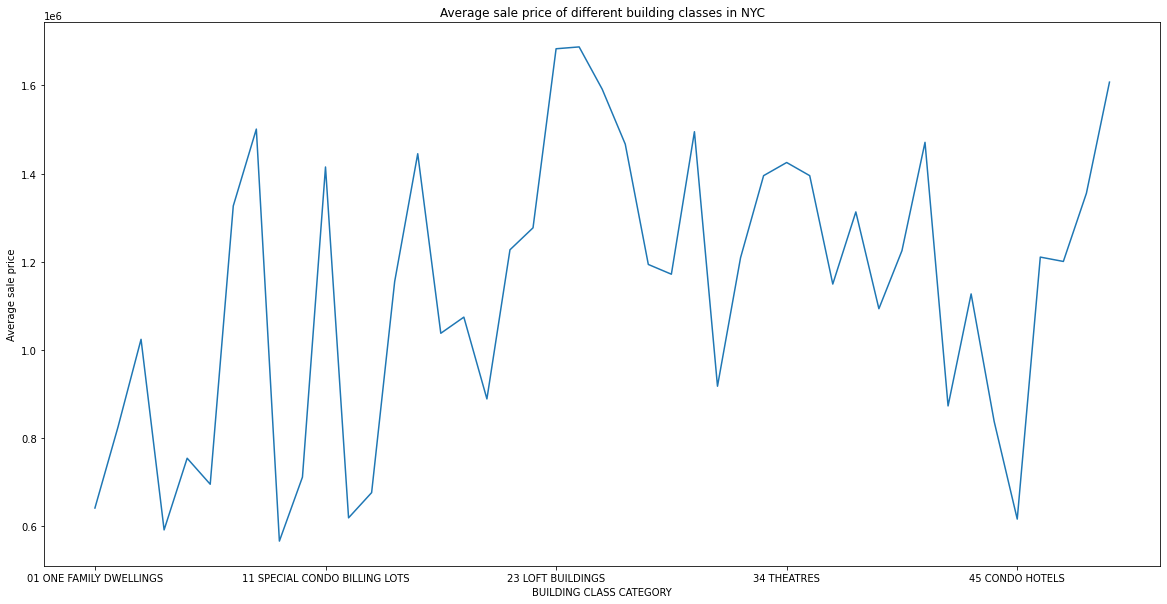

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'].plot()
plt.title('Average sale price of different building classes in NYC')
plt.ylabel('Average sale price')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8112,1,MIDTOWN WEST,11A CONDO-RENTALS,2C,1043,1302,NaN,RR,305 WEST 52ND STREET,RES,10019.0,9.0,0.0,9.0,0.0,5697.0,1951.0,2,RR,619000.0,9/17/18


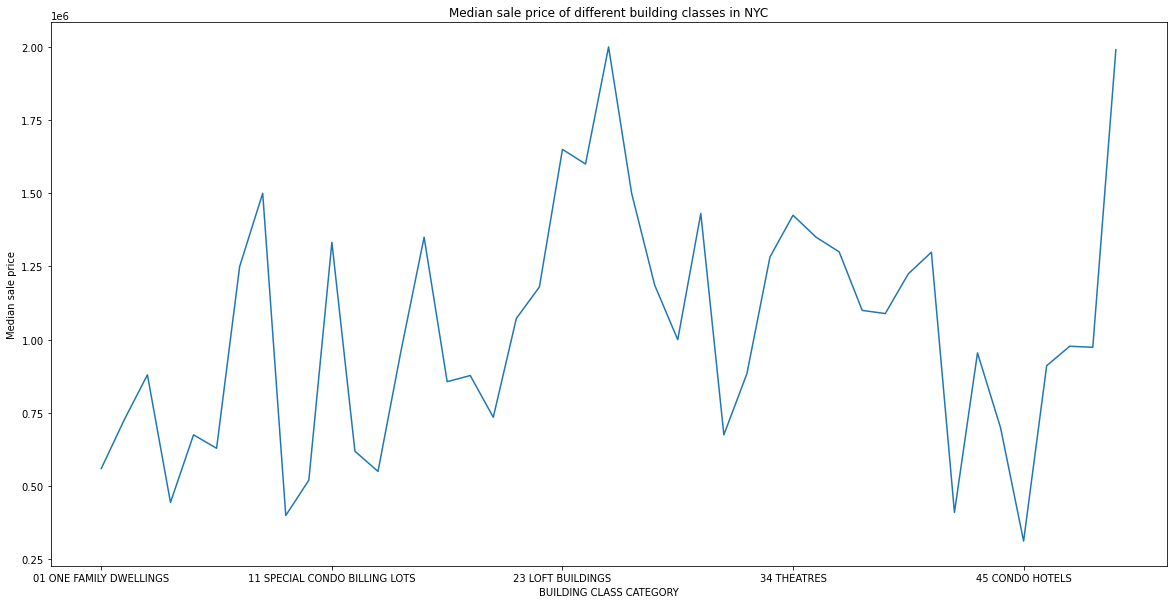

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('BUILDING CLASS CATEGORY').median()['SALE PRICE'].plot()
plt.title('Median sale price of different building classes in NYC')
plt.ylabel('Median sale price')
NYC[NYC['BUILDING CLASS CATEGORY'] == '11A CONDO-RENTALS']

3.2.4 **Tax class at present**

Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.

• Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two
attached apartments), vacant land that is zoned for residential use, and most
condominiums that are not more than three stories.

• Class 2: Includes all other property that is primarily residential, such as
cooperatives and condominiums.

• Class 3: Includes property with equipment owned by a gas, telephone or electric company.

• Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.

vs.

**Tax class at Time of Sale**

In [ ]:
#NYC['TAX CLASS AT PRESENT'] = NYC['TAX CLASS AT PRESENT'].astype('str').astype('category')

In [ ]:
#NYC['TAX CLASS AT TIME OF SALE'] = NYC['TAX CLASS AT TIME OF SALE'].astype('str').astype('category')

In [ ]:
NYC['TAX CLASS AT TIME OF SALE'].unique()

[2, 1, 4]
Categories (3, int64): [2, 1, 4]

In [ ]:
NYC['TAX CLASS AT TIME OF SALE'].value_counts()

1    40144
2    40036
4     2593
Name: TAX CLASS AT TIME OF SALE, dtype: int64

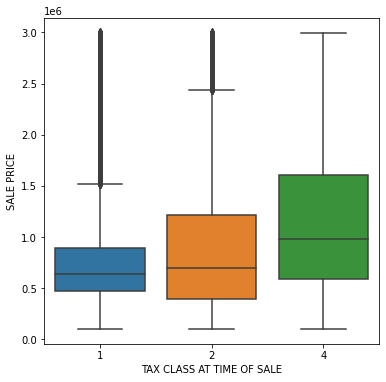

In [ ]:
# Need to rescale sale price
plt.figure(figsize=(6,6))
sns.boxplot(x=NYC['TAX CLASS AT TIME OF SALE'], y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

2.2.5 Block will be skipped

A Tax Block is a sub-division of the borough on which real properties are located.
The Department of Finance uses a Borough-Block-Lot classification to label all real
property in the City. “Whereas” addresses describe the street location of a property, the
block and lot distinguishes one unit of real property from another, such as the different
condominiums in a single building. Also, block and lots are not subject to name changes
based on which side of the parcel the building puts its entrance on. 

2.2.6 Lot will be skipped

A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

2.2.7 **Building Class at Present**:

The Building Classification is used to describe a property’s constructive use. The first position
of the Building Class is a letter that is used to describe a general class of properties (for
example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies
condominiums). The second position, a number, adds more specific information about the
property’s use or construction style (using our previous examples “A0” is a Cape Cod style
one family home, “O4” is a tower type office building and “R5” is a commercial condominium
unit). The term Building Class used by the Department of Finance is interchangeable with the
term Building Code used by the Department of Buildings. See NYC Building Classifications.

vs.

**Building Class at time of sale**

The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of
properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information
about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial
condominium unit). The term Building Class as used by the Department of Finance is interchangeable with the term Building Code as used by the Department of Buildings. 


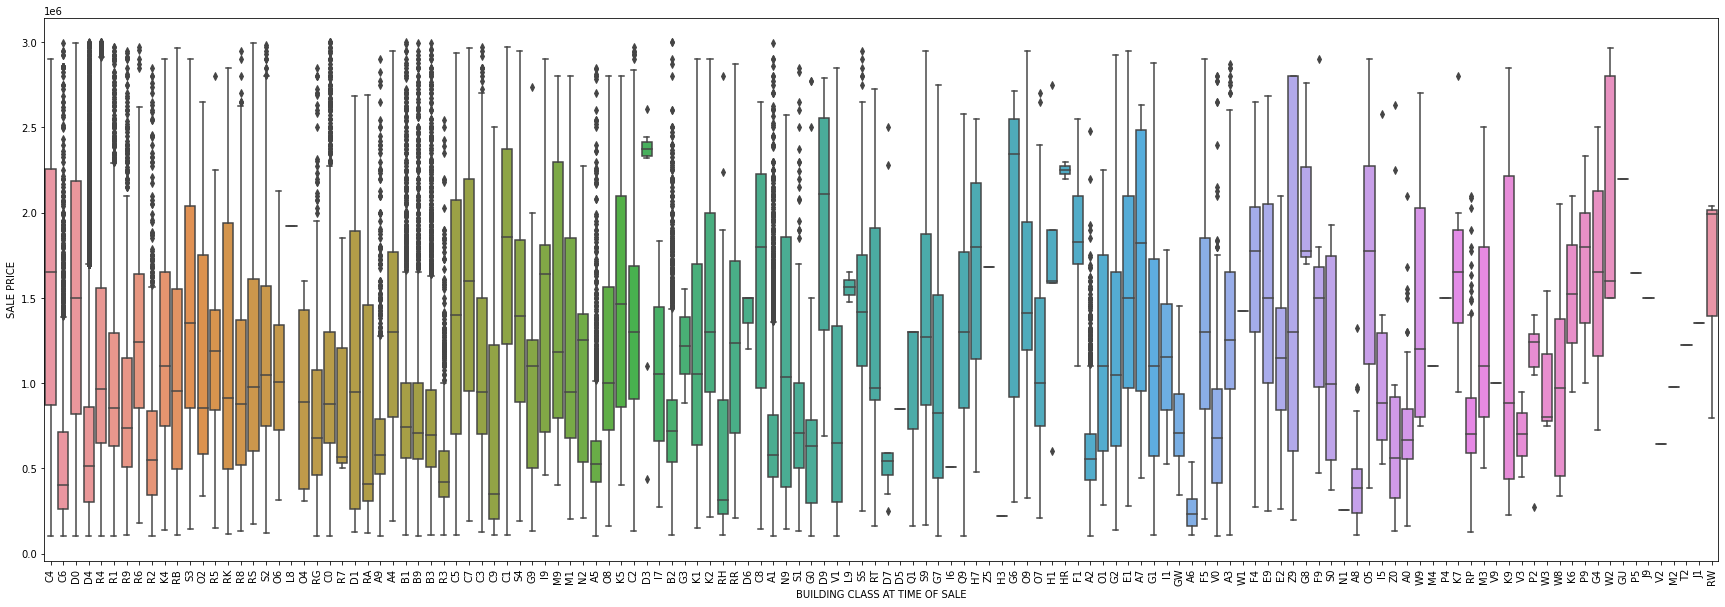

In [ ]:
plt.figure(figsize=(30,10))
order = NYC['BUILDING CLASS AT TIME OF SALE'].unique()
sns.boxplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=NYC, order = order)
plt.xticks(rotation=90)
plt.show()

In [ ]:
NYC.loc[NYC['SALE PRICE'].idxmax()]

BOROUGH                                                                3
NEIGHBORHOOD                                                 BOERUM HILL
BUILDING CLASS CATEGORY                  13 CONDOS - ELEVATOR APARTMENTS
TAX CLASS AS OF FINAL ROLL 18/19                                       2
BLOCK                                                                278
LOT                                                                 1117
EASE-MENT                                                            NaN
BUILDING CLASS AS OF FINAL ROLL 18/19                                 R4
ADDRESS                                           233 PACIFIC STREET, 4A
APARTMENT NUMBER                                                      4A
ZIP CODE                                                           11201
RESIDENTIAL UNITS                                                      1
COMMERCIAL UNITS                                                       0
TOTAL UNITS                                        

In [ ]:
# NYC[NYC['BUILDING CLASS AT PRESENT'] == 'K3']

2.2.8 YEAR BUILT

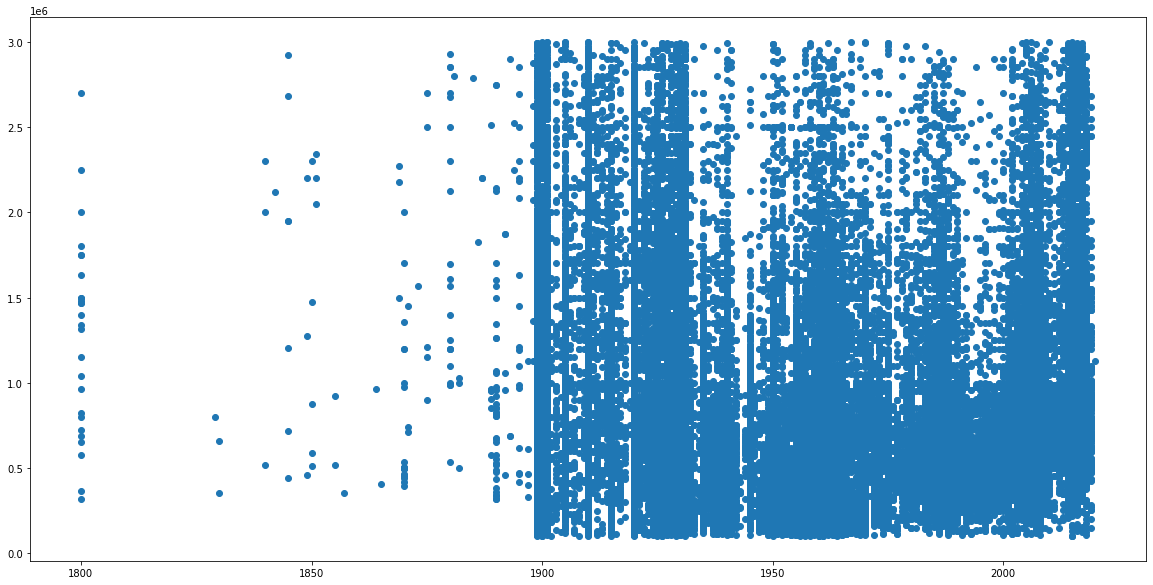

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x = 'YEAR BUILT', y = 'SALE PRICE', data = NYC)

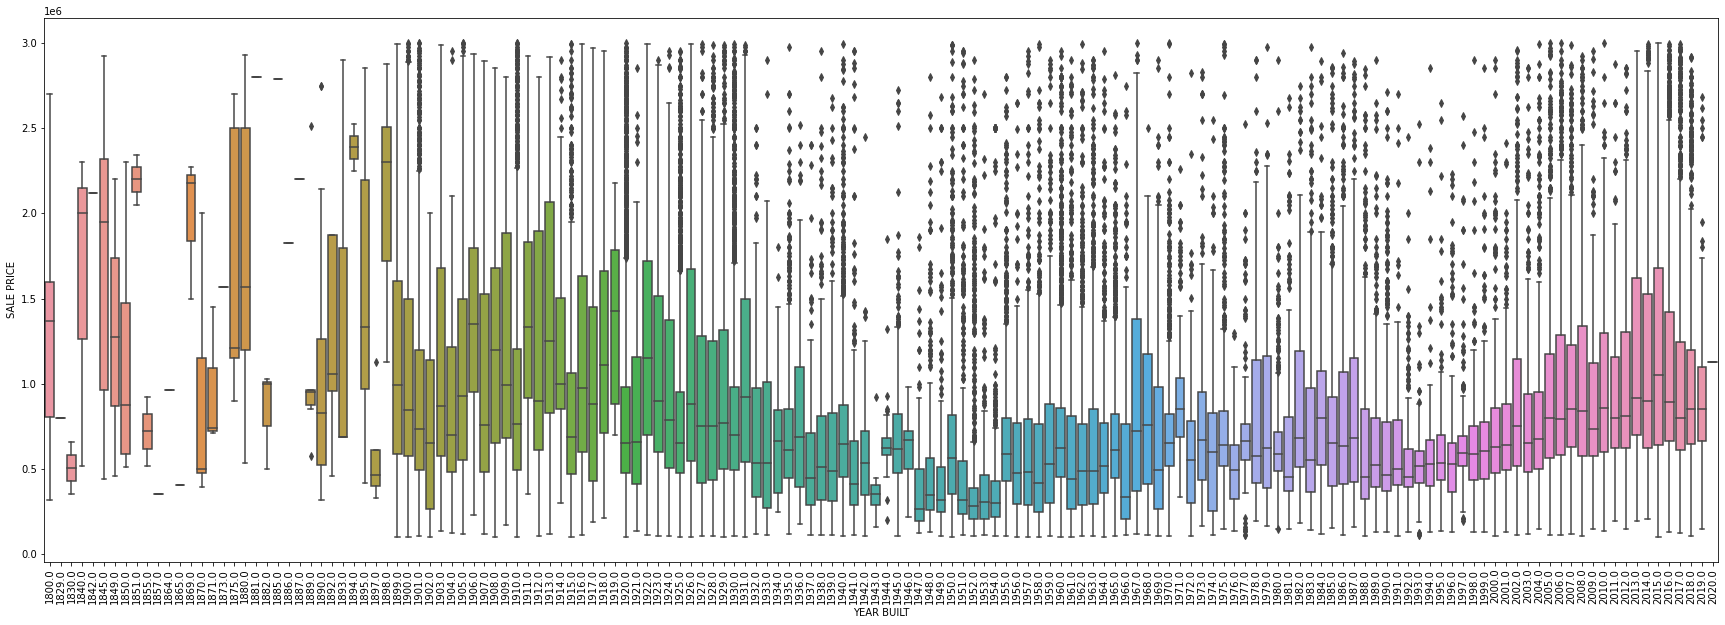

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x = 'YEAR BUILT', y = 'SALE PRICE', data=NYC)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Median sale price')

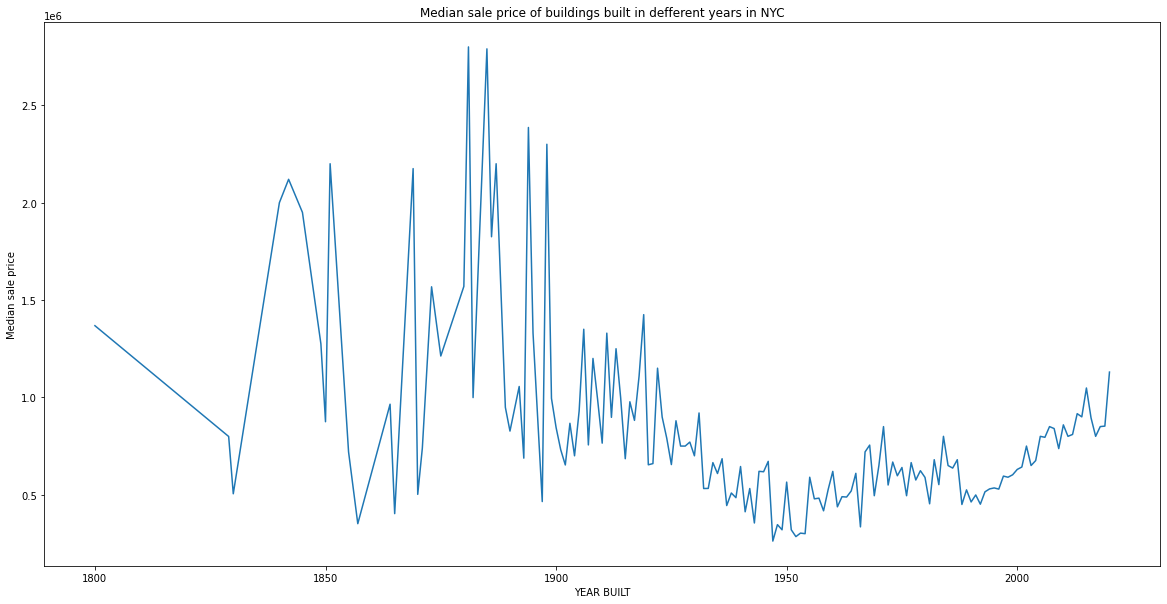

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('YEAR BUILT').median()['SALE PRICE'].plot()
plt.title('Median sale price of buildings built in defferent years in NYC')
plt.ylabel('Median sale price')

Text(0, 0.5, 'Mean sale price')

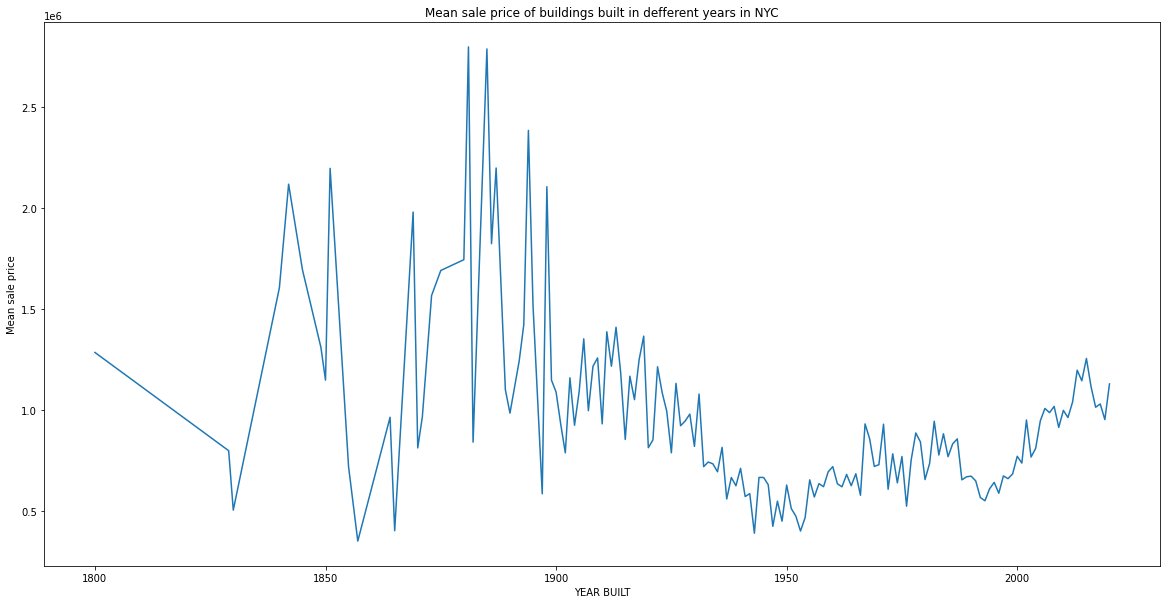

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('YEAR BUILT').mean()['SALE PRICE'].plot()
plt.title('Mean sale price of buildings built in defferent years in NYC')
plt.ylabel('Mean sale price')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Year Built')

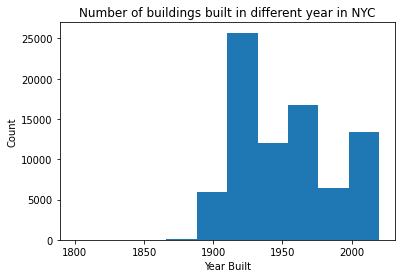

In [ ]:
plt.hist(NYC['YEAR BUILT'])
plt.title('Number of buildings built in different year in NYC')
plt.ylabel('Count')
plt.xlabel("Year Built")

Text(0, 0.5, 'Average sale price')

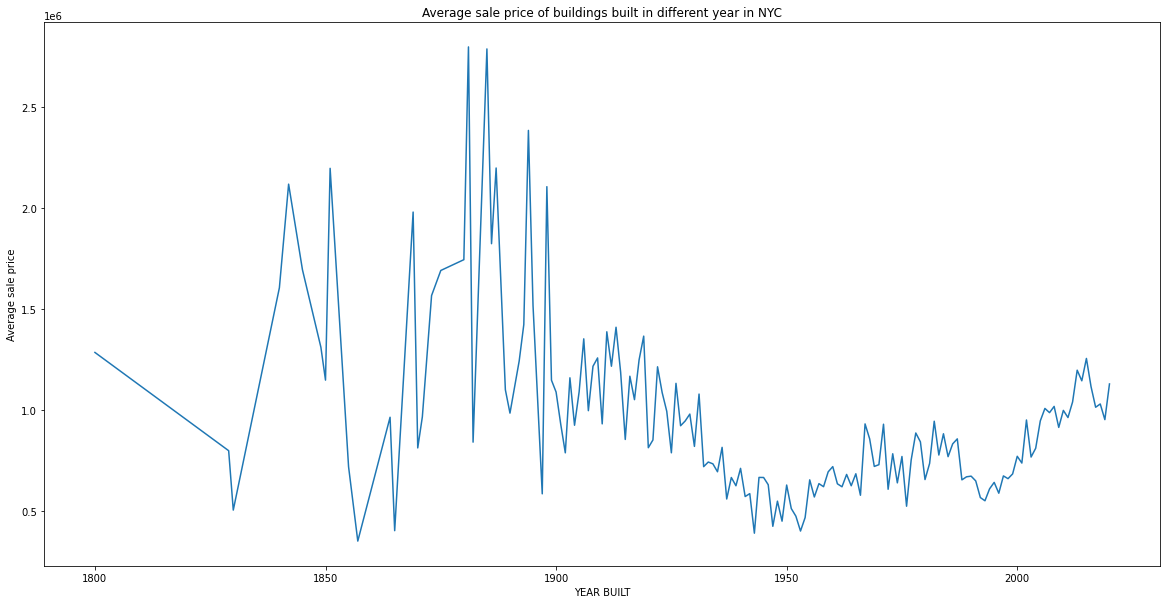

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('YEAR BUILT').mean()['SALE PRICE'].plot()
plt.title('Average sale price of buildings built in different year in NYC')
plt.ylabel('Average sale price')

Text(0, 0.5, 'Median sale price')

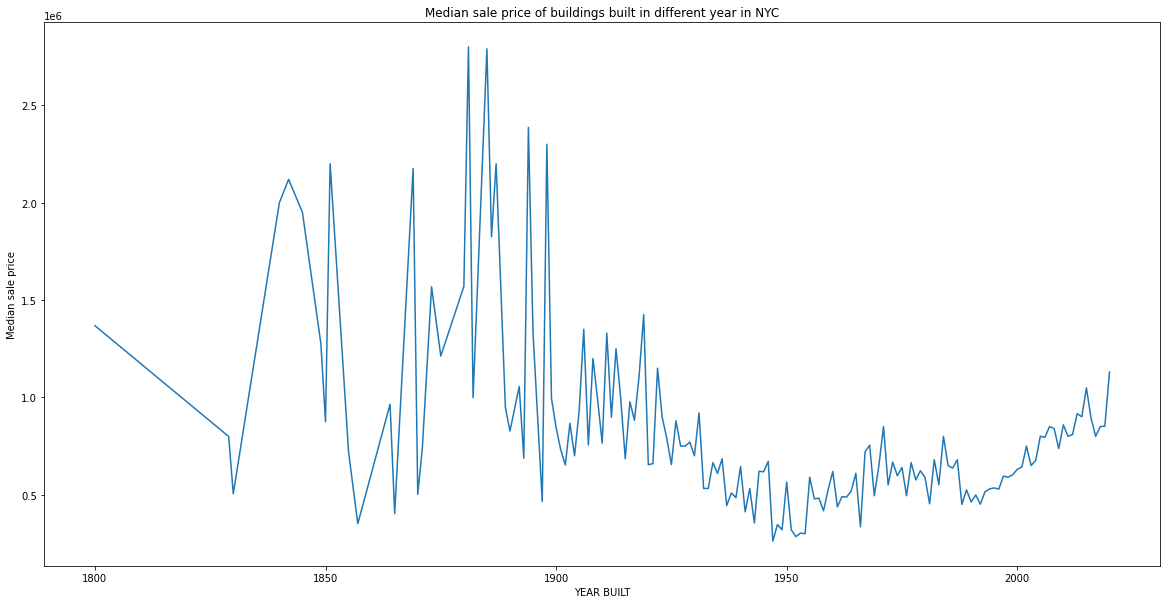

In [ ]:
plt.figure(figsize=(20,10))
NYC.groupby('YEAR BUILT').median()['SALE PRICE'].plot()
plt.title('Median sale price of buildings built in different year in NYC')
plt.ylabel('Median sale price')

2.2.9 Address, zipcode, apt number will be skipped

2.2.10 Residential Unit

In [ ]:
NYC['RESIDENTIAL UNITS'].dropna().nunique()

60

In [ ]:
NYC['RESIDENTIAL UNITS'].dropna().value_counts()

1.0      35911
0.0      16318
2.0      15292
3.0       3879
4.0        976
6.0        411
5.0        164
8.0        146
7.0         60
10.0        52
9.0         40
12.0        31
11.0        22
15.0        21
16.0        17
20.0        14
13.0        13
14.0        12
26.0        12
17.0         8
18.0         7
122.0        7
24.0         6
30.0         5
28.0         5
21.0         4
155.0        4
19.0         4
35.0         4
27.0         3
22.0         3
32.0         2
40.0         2
55.0         2
38.0         2
48.0         2
39.0         2
36.0         2
70.0         1
31.0         1
37.0         1
66.0         1
25.0         1
130.0        1
45.0         1
261.0        1
33.0         1
80.0         1
142.0        1
59.0         1
145.0        1
29.0         1
312.0        1
77.0         1
53.0         1
41.0         1
285.0        1
68.0         1
63.0         1
134.0        1
Name: RESIDENTIAL UNITS, dtype: int64

In [ ]:
NYC['RESIDENTIAL UNITS'].max()

312.0

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.2951e+04, 3.5100e+02, 7.8000e+01, 3.1000e+01, 2.8000e+01,
        1.0000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,   6.24,  12.48,  18.72,  24.96,  31.2 ,  37.44,  43.68,
         49.92,  56.16,  62.4 ,  68.64,  74.88,  81.12,  87.36,  93.6 ,
         99.84, 106.08, 112.32, 118.56, 124.8 , 131.04, 137.28, 143.52,
        149.76, 156.  , 162.24, 168.48, 174.72, 180.96, 187.2 , 193.44,
        199.68, 205.92, 212.16

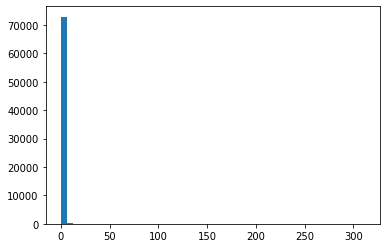

In [ ]:
plt.hist(x='RESIDENTIAL UNITS', data=NYC, bins = 50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


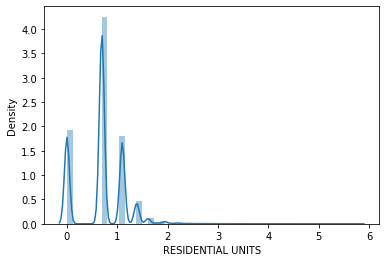

In [ ]:
# log(1+x) transform commercial units
sns.distplot(np.log1p(NYC["RESIDENTIAL UNITS"]))

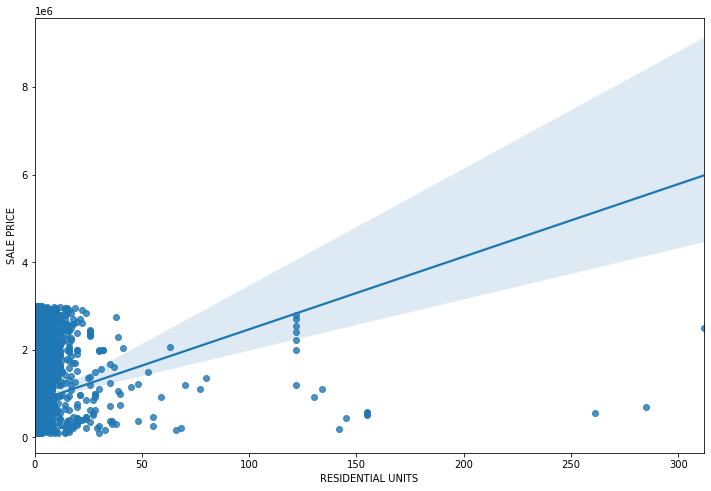

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='RESIDENTIAL UNITS', y='SALE PRICE',data=NYC)

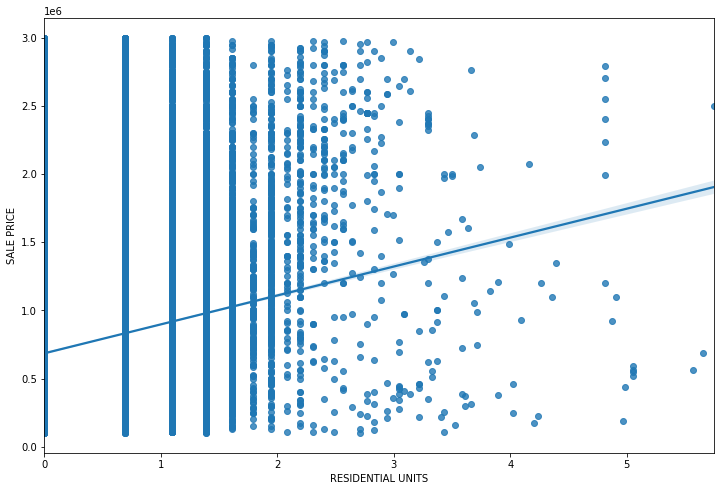

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x=np.log1p(NYC["RESIDENTIAL UNITS"]), y=NYC['SALE PRICE'])

2.2.11 Commercial Units

In [ ]:
NYC['COMMERCIAL UNITS'].dropna().nunique()

28

In [ ]:
NYC['COMMERCIAL UNITS'].dropna().value_counts()

0.0      69661
1.0       3181
2.0        363
3.0        107
4.0         42
22.0        31
6.0         20
5.0         20
252.0       16
8.0          7
7.0          5
259.0        5
35.0         4
20.0         3
133.0        3
64.0         2
65.0         2
10.0         2
16.0         2
21.0         2
9.0          2
28.0         1
14.0         1
25.0         1
13.0         1
15.0         1
47.0         1
60.0         1
Name: COMMERCIAL UNITS, dtype: int64

In [ ]:
NYC['COMMERCIAL UNITS'].max()

259.0

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.3374e+04, 3.6000e+01, 3.0000e+00, 5.0000e+00, 3.4000e+01,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01, 5.0000e+00]),
 array([  0.  ,   5.18,  10.36,  15.54,  20.72,  25.9 ,  31.08,  36.26,
         41.44,  46.62,  51.8 ,  56.98,  62.16,  67.34,  72.52,  77.7 ,
         82.88,  88.06,  93.24,  98.42, 103.6 , 108.78, 113.96, 119.14,
        124.32, 129.5 , 134.68, 139.86, 145.04, 150.22, 155.4 , 160.58,
        165.76, 170.94, 176.12

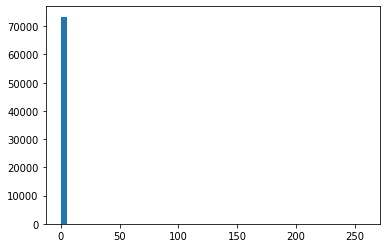

In [ ]:
plt.hist(x='COMMERCIAL UNITS', data=NYC, bins = 50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


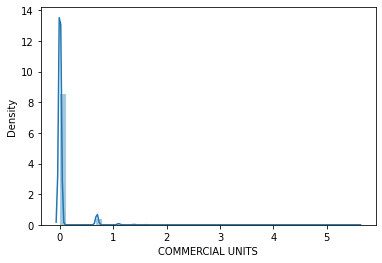

In [ ]:
# log(1+x) transform commercial units
sns.distplot(np.log1p(NYC["COMMERCIAL UNITS"]))

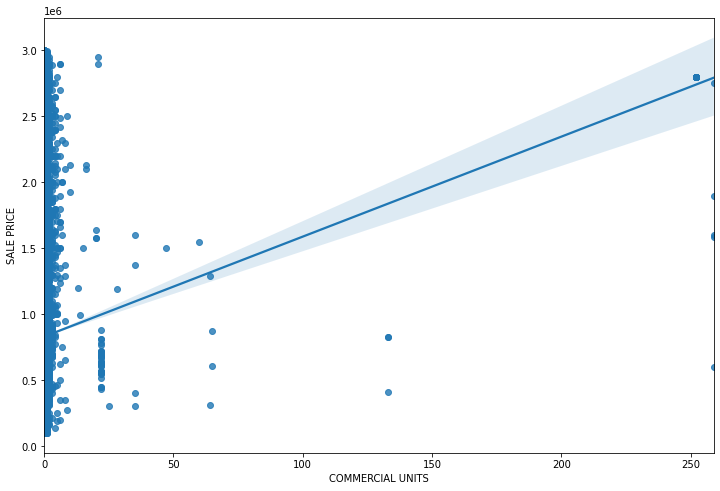

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='COMMERCIAL UNITS', y='SALE PRICE',data=NYC)

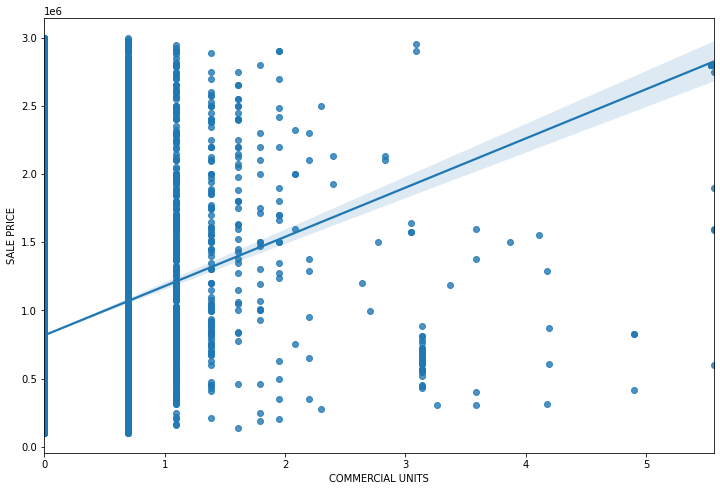

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x=np.log1p(NYC["COMMERCIAL UNITS"]), y=NYC['SALE PRICE'])

Total Units

In [ ]:
NYC['TOTAL UNITS'].dropna().nunique()

71

In [ ]:
NYC['TOTAL UNITS'].dropna().value_counts()

1.0      37181
2.0      15085
0.0      14155
3.0       4485
4.0       1071
         ...  
23.0         1
53.0         1
77.0         1
73.0         1
288.0        1
Name: TOTAL UNITS, Length: 71, dtype: int64

In [ ]:
NYC['TOTAL UNITS'].max()

321.0

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.2704e+04, 4.3500e+02, 9.1000e+01, 3.3000e+01, 2.7000e+01,
        1.9000e+01, 5.0000e+00, 4.7000e+01, 6.2000e+01, 7.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,   6.42,  12.84,  19.26,  25.68,  32.1 ,  38.52,  44.94,
         51.36,  57.78,  64.2 ,  70.62,  77.04,  83.46,  89.88,  96.3 ,
        102.72, 109.14, 115.56, 121.98, 128.4 , 134.82, 141.24, 147.66,
        154.08, 160.5 , 166.92, 173.34, 179.76, 186.18, 192.6 , 199.02,
        205.44, 211.86, 218.28

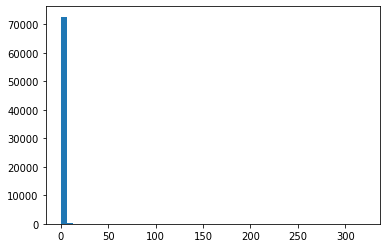

In [ ]:
plt.hist(x='TOTAL UNITS', data=NYC, bins = 50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


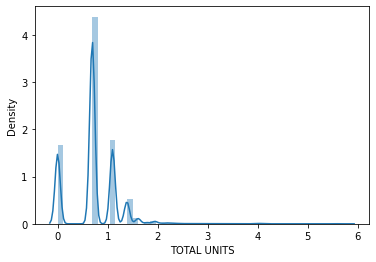

In [ ]:
# log(1+x) transform commercial units
sns.distplot(np.log1p(NYC["TOTAL UNITS"]))

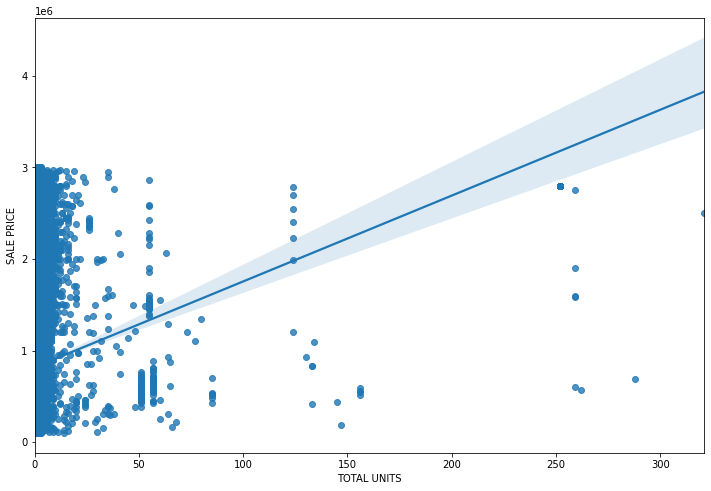

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x='TOTAL UNITS', y='SALE PRICE',data=NYC)

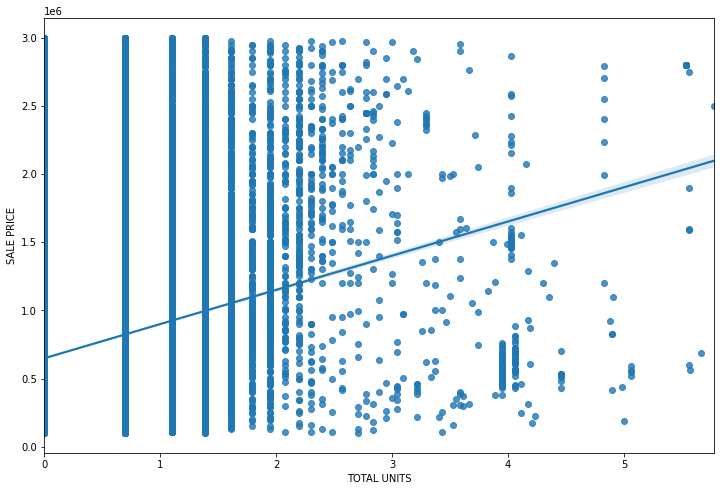

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x=np.log1p(NYC["TOTAL UNITS"]), y=NYC['SALE PRICE'])

2.2.12 Land Square Feet and Gross Square Feet

**Description:**
- Land Square Feet is the usable or assignable square footage within the property, also known as net square feet (NSF)
- Gross Square Feet is the space occupied by the intradepartmental circulation and the walls and partitions within the property, includes the land square feet 


In [ ]:
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

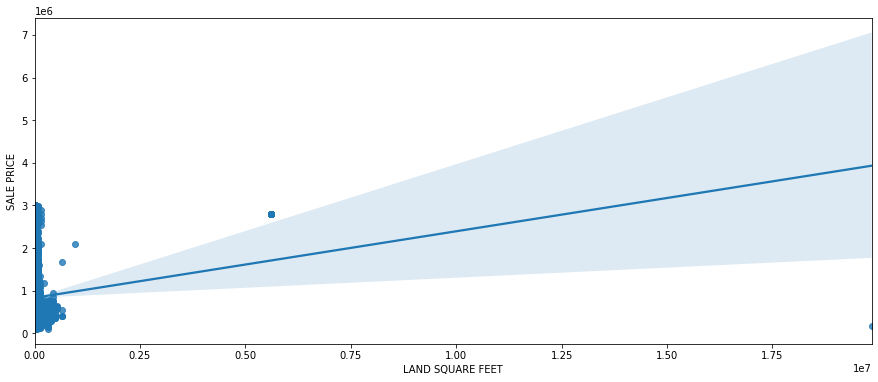

In [ ]:
plt.figure(figsize=(15,6))
a=sns.regplot(x="LAND SQUARE FEET", y="SALE PRICE", data=NYC)
# b=sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=NYC)

In [ ]:
len(NYC['NEIGHBORHOOD'].unique())

251

In [ ]:
len(NYC['BUILDING CLASS AT TIME OF SALE'].unique())

132

In [ ]:
len(NYC['BUILDING CLASS CATEGORY'].unique())

45

In [ ]:
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## One-hot encoding

In [ ]:
#Justify? - Fan
NYC.loc[NYC['COMMERCIAL UNITS']>10,'units_category'] = 'A' ## commericial >10 
NYC.loc[(NYC['RESIDENTIAL UNITS']>0)&(NYC['COMMERCIAL UNITS']<=10),'units_category'] = 'B'  ## 0<commercial<=10 1
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']==1),'units_category'] = 'C' ## commercial = 0 residential = 1
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']>1)&(NYC['RESIDENTIAL UNITS']<10),'units_category'] = 'D' ## commercial =0 1<residential<10
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']>=10),'units_category'] = 'E'## commercial = 0 residential>=10
NYC.loc[(NYC['COMMERCIAL UNITS']==0)&(NYC['RESIDENTIAL UNITS']==0),'units_category'] = 'F'
NYC['units_category'] = NYC['units_category'].astype('category')

In [ ]:
NYC = NYC.drop(['TOTAL UNITS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS'], axis =1)
NYC

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,units_category
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,NaN,C4,187 EAST 7TH STREET,NaN,10009.0,1642.0,5220.0,1910.0,2,C4,2400000.0,5/18/18,B
17,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,47,NaN,C4,377 EAST 10TH,NaN,10009.0,2370.0,10715.0,1900.0,2,C4,954623.0,6/4/18,E
47,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,406,27,NaN,C4,544 EAST 13TH STREET,NaN,10009.0,2468.0,10888.0,1900.0,2,C4,1423033.0,6/4/18,E
48,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,406,27,NaN,C4,"544 EAST 13TH STREET, 5AB",NaN,10009.0,2468.0,10888.0,1900.0,2,C4,129238.0,6/4/18,E
61,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,NaN,C6,"327 EAST 3RD STREET, 1E",NaN,10009.0,0.0,0.0,1920.0,2,C6,385000.0,8/28/18,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167711,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,68,NaN,B9,62 AMBASSADOR LA,NaN,10309.0,2340.0,2160.0,2001.0,1,B9,610000.0,8/6/19,D
167712,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,85,NaN,B9,104 AMBASSADOR LANE,NaN,10309.0,2730.0,2565.0,2001.0,1,B9,625000.0,7/30/19,D
167714,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355,95,NaN,B9,115 AMBASSADOR LANE,NaN,10309.0,8846.0,1710.0,2001.0,1,B9,637500.0,8/20/19,D
167715,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7094,48,NaN,B9,108 BERKSHIRE LANE,NaN,10309.0,0.0,0.0,2018.0,1,V0,599701.0,4/24/19,D


In [ ]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
NYC_final1 = pd.get_dummies(NYC, columns=['BOROUGH', 'NEIGHBORHOOD','BUILDING CLASS AT TIME OF SALE','BUILDING CLASS CATEGORY'])
NYC_final1.head()
NYC_final1.shape

(82773, 448)

In [ ]:
# NEIGHBORHOOD, BUILDING CLASS AT TIME OF SALE - integer encoding
NYC_final2 = pd.get_dummies(NYC, columns=['BOROUGH','TAX CLASS AT TIME OF SALE', 'units_category', 'BUILDING CLASS CATEGORY'])
#NYC_final2[['BUILDING CLASS CATEGORY', 
#            'TAX CLASS AT TIME OF SALE',
#            'units_category']] = NYC_final2[['BUILDING CLASS CATEGORY', 
#                                             'TAX CLASS AT TIME OF SALE','units_category']].apply(lambda x: x.astype('category').cat.codes)

In [ ]:
NYC_final2

,NEIGHBORHOOD,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_4,units_category_A,units_category_B,units_category_C,units_category_D,units_category_E,units_category_F,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS
11,ALPHABET CITY,2B,390,64,NaN,C4,187 EAST 7TH STREET,NaN,10009.0,1642.0,5220.0,1910.0,C4,2400000.0,5/18/18,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,ALPHABET CITY,2,393,47,NaN,C4,377 EAST 10TH,NaN,10009.0,2370.0,10715.0,1900.0,C4,954623.0,6/4/18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,ALPHABET CITY,2,406,27,NaN,C4,544 EAST 13TH STREET,NaN,10009.0,2468.0,10888.0,1900.0,C4,1423033.0,6/4/18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,ALPHABET CITY,2,406,27,NaN,C4,"544 EAST 13TH STREET, 5AB",NaN,10009.0,2468.0,10888.0,1900.0,C4,129238.0,6/4/18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,ALPHABET CITY,2,373,40,NaN,C6,"327 EAST 3RD STREET, 1E",NaN,10009.0,0.0,0.0,1920.0,C6,385000.0,8/28/18,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
NYC.isnull().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19            61
BLOCK                                        0
LOT                                          0
EASE-MENT                                82773
BUILDING CLASS AS OF FINAL ROLL 18/19       61
ADDRESS                                      0
APARTMENT NUMBER                         64779
ZIP CODE                                     3
LAND SQUARE FEET                          9286
GROSS SQUARE FEET                         9286
YEAR BUILT                                2462
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
units_category                           11410
dtype: int64

Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X = NYC_final2.drop('SALE PRICE', axis = 1)
y = NYC_final2['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Linear Regression

In [ ]:
# linearity
# multicolinearity - ?
# y normal - checked
# var(y|xi) is constant across xi
# x is independent 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

ValueError: ignored

In [ ]:
# intercept
print(lin_reg.intercept_)

In [ ]:
# coefficient dataframe
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
pred_linear = lin_reg.predict(X_test)
plt.scatter(y_test, pred_linear)

In [ ]:
pred_linear

In [ ]:
# residual plot
sns.distplot((y_test - pred_linear), bins=50);

In [ ]:
# evaluation
# log(1+price) - ideal mse = 0 - what is the ideal mse in this case?

print('MAE:', metrics.mean_absolute_error(y_test, pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_linear)))
print('R-square', metrics.r2_score(y_test, pred_linear))

Robust regression

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=1000)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [ ]:
# change later
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df_2

Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [ ]:
# change later
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_predict = ridge_reg.predict(X_test)

In [ ]:
# intercept
print(ridge_reg.intercept_)

In [ ]:
# coefficients
coeff_df = pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
plt.scatter(y_test, ridge_reg_predict)

In [ ]:
# residual histogram
sns.distplot((y_test - ridge_reg_predict), bins=50)

In [ ]:
# regression evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, ridge_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, ridge_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_reg_predict)))
print('R-square', metrics.r2_score(y_test, ridge_reg_predict))

LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predict = lasso_reg.predict(X_test)

In [ ]:
# intercept
print(lasso_reg.intercept_)

In [ ]:
# coefficients
coeff_df = pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
plt.scatter(y_test, lasso_reg_predict)

In [ ]:
# residual histogram
sns.distplot((y_test - lasso_reg_predict), bins=50)

In [ ]:
# regression evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, lasso_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, lasso_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_reg_predict)))
print('R-square', metrics.r2_score(y_test, lasso_reg_predict))

Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_elastic = model.predict(X_test)
train_elastic = model.predict(X_train)


In [ ]:
# evaluation
mse = metrics.mean_squared_error(y_train, train_elastic)
r2_square = metrics.r2_score(y_train, train_elastic)
print('MSE for test:', mse)
print('R2 Square for test', r2_square)

In [ ]:
mse = metrics.mean_squared_error(y_test, test_elastic)
r2_square = metrics.r2_score(y_test, test_elastic)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_elastic))
print('MSE:', metrics.mean_squared_error(y_test, test_elastic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_elastic)))
print('R-square', metrics.r2_score(y_test, test_elastic))